In [1]:
import json
import re
import sys

In [2]:
from konlpy.tag import Twitter
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc

In [4]:
import pytagcloud

In [5]:
def showGraph(dust):
    font_location="C:\Windows\Fonts\HYKANB.ttf"
    font_name=font=font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font',family=font_name)
    plt.xlabel('주요단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values=sorted(dust.values(),reverse=True)
    Sorted_Dict_Keys=sorted(dust, key=dust.get, reverse=True)
    plt.bar(range(len(dust)),Sorted_Dict_Values,align='center')
    plt.xticks(range(len(dust)),list(Sorted_Dict_Keys),rotation='70') 
    plt.show()

In [6]:
def saveWorldCloud(wordInfo, filename): 
    taglist=pytagcloud.make_tags(dict(wordInfo).items(),maxsize=60)
    pytagcloud.create_tag_image(taglist,filename,size=(1024,768),fontname='kor',rectangular=False)

In [7]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list 

In [8]:
 def main():
    openFileName='남북정상회담_naver.json'
    output_file_Name = '남북정상회담(word파일).json'
    cloudImageFile='wordcloud.jpg'
    rfile=open(openFileName, 'r', encoding='utf-8').read()
    open_output_file= open(output_file_Name, 'w', encoding='utf-8')
    jsonData=json.loads(rfile)
    message=""
    for item in jsonData:
        if 'description' in item.keys():
            message=message+re.sub(r'[^\w]', '', item['description'])+'' 
            
    nlp=Twitter()
    nouns=nlp.nouns(message)
    count=Counter(nouns)
    
    wordInfo=dict()
    for tags, counts in count.most_common(50):
        if (len(str(tags))>1):
            wordInfo[tags]=counts
            print("%s : %d" % (tags, counts))

    open_output_file.write('{} {}\n'.format(nouns, count)) 
    saveWorldCloud(wordInfo,cloudImageFile)


In [9]:
if __name__=="__main__":
    main()

남북정상회담 : 1028
평화 : 408
이후 : 378
남북 : 314
그림 : 250
펀딩 : 249
한효주 : 249
인스타그램 : 249
무단 : 246
길목 : 245
복제 : 233
배포 : 233
정상회담 : 229
및재 : 228
금지 : 227
기자 : 203
한반도 : 187
북미 : 180
북한 : 176
판문점 : 164
고위 : 147
후속 : 145
회담 : 143
조치 : 134
민주당 : 129
지난달 : 119
정부 : 119
대통령 : 109
협력 : 108
선언 : 104
청와대 : 96
한국 : 96
총리 : 94
서울 : 93
경제 : 93
문재인 : 89
개최 : 88
사진 : 88
대한 : 86
정청 : 82
뉴스 : 76
문제 : 75
에서 : 71
연합뉴스 : 71
협의 : 70


In [10]:
import pandas as pd
from pandas import Series, DataFrame    

In [11]:
SN_Korea = pd.DataFrame([{'주요단어' : '남북정상회담', '빈도수' : '1030'},
                         {'주요단어' : '평화', '빈도수' : '397'},
                         {'주요단어' : '이후', '빈도수' : '340'},
                         {'주요단어' : '대통령', '빈도수' : '317'},
                         {'주요단어' : '그림', '빈도수' : '249'},
                         {'주요단어' : '펀딩', '빈도수' : '248'},
                         {'주요단어' : '한효주', '빈도수' : '248'},
                         {'주요단어' : '인스타그램', '빈도수' : '248'},
                         {'주요단어' : '길목', '빈도수' : '245'},
                         {'주요단어' : '정상회담', '빈도수' : '238'},
                         {'주요단어' : '무단', '빈도수' : '235'},
                         {'주요단어' : '복제', '빈도수' : '230'},
                         {'주요단어' : '남북', '빈도수' : '228'},
                         {'주요단어' : '판문점', '빈도수' : '223'},
                         {'주요단어' : '배포', '빈도수' : '217'},
                         {'주요단어' : '및재', '빈도수' : '215'},
                         {'주요단어' : '금지', '빈도수' : '213'},
                         {'주요단어' : '북미', '빈도수' : '210'},
                         {'주요단어' : '북한', '빈도수' : '193'},
                         {'주요단어' : '기자', '빈도수' : '193'},
                         {'주요단어' : '문재인', '빈도수' : '155'},
                         {'주요단어' : '트럼프', '빈도수' : '134'},
                         {'주요단어' : '한반도', '빈도수' : '133'},
                         {'주요단어' : '공연', '빈도수' : '128'},
                         {'주요단어' : '지난달', '빈도수' : '119'},
                         {'주요단어' : '개최', '빈도수' : '99'},
                         {'주요단어' : '만찬', '빈도수' : '91'},
                         {'주요단어' : '미국', '빈도수' : '87'},
                         {'주요단어' : '선언', '빈도수' : '85'},
                         {'주요단어' : '회담', '빈도수' : '85'},
                         {'주요단어' : '청와대', '빈도수' : '83'},
                         {'주요단어' : '김정은', '빈도수' : '82'},
                         {'주요단어' : '평양', '빈도수' : '73'},
                         {'주요단어' : '정상', '빈도수' : '72'},
                         {'주요단어' : '사진', '빈도수' : '71'},
                         {'주요단어' : '비핵화', '빈도수' : '67'},
                         {'주요단어' : '지난', '빈도수' : '67'},    
                         {'주요단어' : '싱가포르', '빈도수' : '65'},
                         {'주요단어' : '협력', '빈도수' : '61'},
                         {'주요단어' : '장소', '빈도수' : '57'},
                         {'주요단어' : '대표', '빈도수' : '55'},
                         {'주요단어' : '한국', '빈도수' : '55'},
                         {'주요단어' : '오연', '빈도수' : '54'},
                         {'주요단어' : '최근', '빈도수' : '53'},
                         {'주요단어' : '직후', '빈도수' : '52'},
                         {'주요단어' : '관심', '빈도수' : '52'},
                         {'주요단어' : '관계', '빈도수' : '50'},
                         {'주요단어' : '당시', '빈도수' : '50'},
                         {'주요단어' : '국무위원', '빈도수' : '49'},
                         {'주요단어' : '오찬', '빈도수' : '47'}])

In [25]:
SN_Korea.to_csv("남북정상회담.csv",encoding="cp949",mode="w",index=True)

In [12]:
SN_Korea

빈도수    주요단어
0   1030  남북정상회담
1    397      평화
2    340      이후
3    317     대통령
4    249      그림
5    248      펀딩
6    248     한효주
7    248   인스타그램
8    245      길목
9    238    정상회담
10   235      무단
11   230      복제
12   228      남북
13   223     판문점
14   217      배포
15   215      및재
16   213      금지
17   210      북미
18   193      북한
19   193      기자
20   155     문재인
21   134     트럼프
22   133     한반도
23   128      공연
24   119     지난달
25    99      개최
26    91      만찬
27    87      미국
28    85      선언
29    85      회담
30    83     청와대
31    82     김정은
32    73      평양
33    72      정상
34    71      사진
35    67     비핵화
36    67      지난
37    65    싱가포르
38    61      협력
39    57      장소
40    55      대표
41    55      한국
42    54      오연
43    53      최근
44    52      직후
45    52      관심
46    50      관계
47    50      당시
48    49    국무위원
49    47      오찬

In [15]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (50,10) 

In [16]:
x=SN_Korea['주요단어']

In [17]:
y=SN_Korea['빈도수']

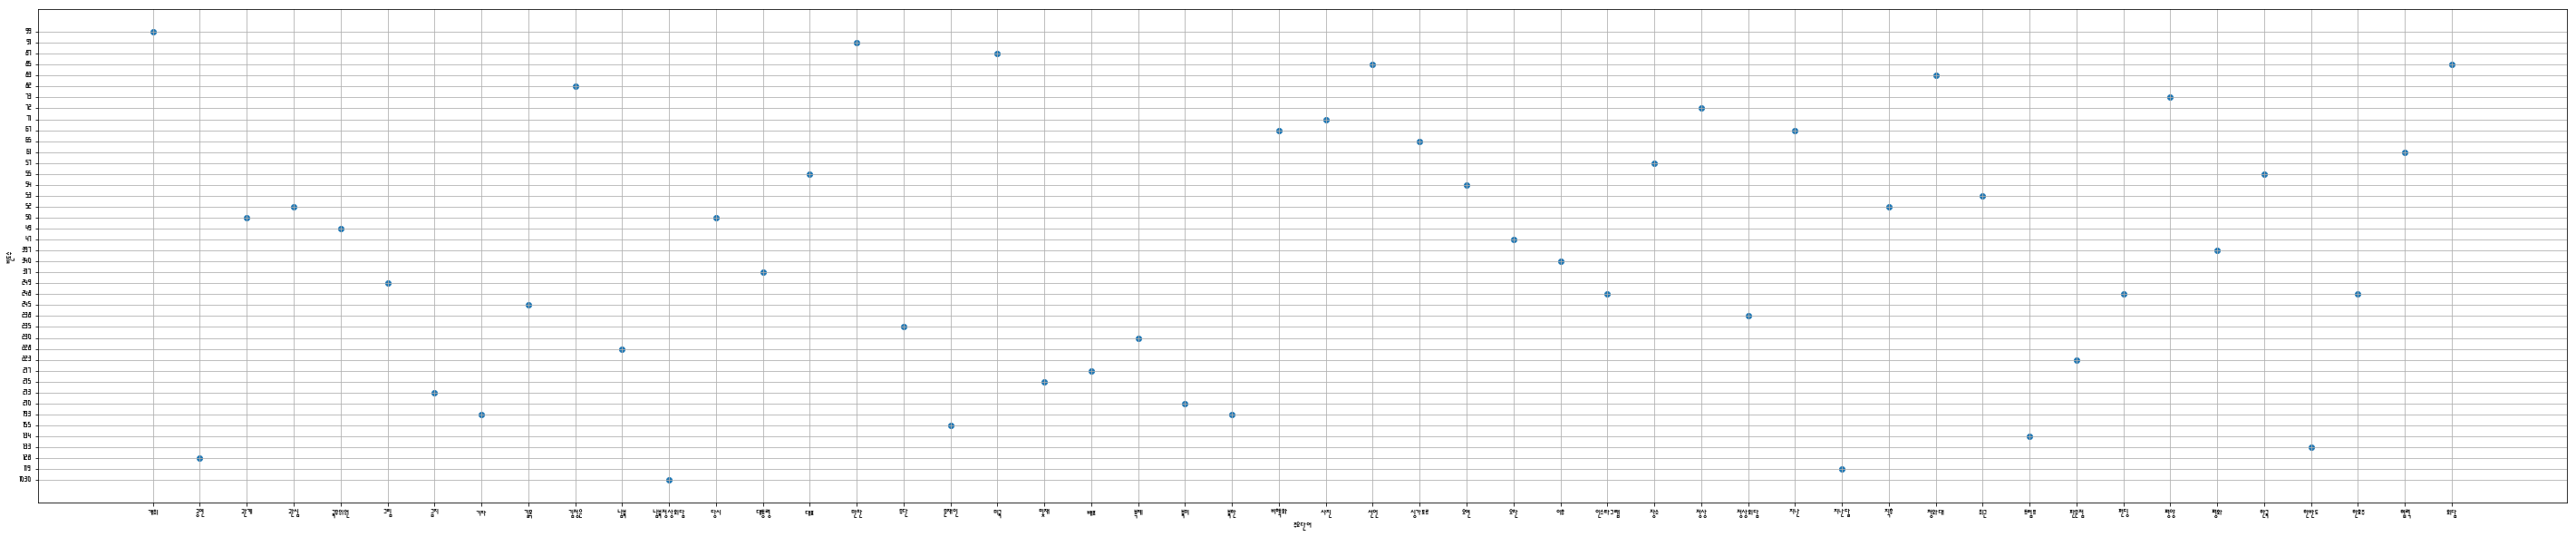

In [18]:
plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)

plt.scatter(x,y)

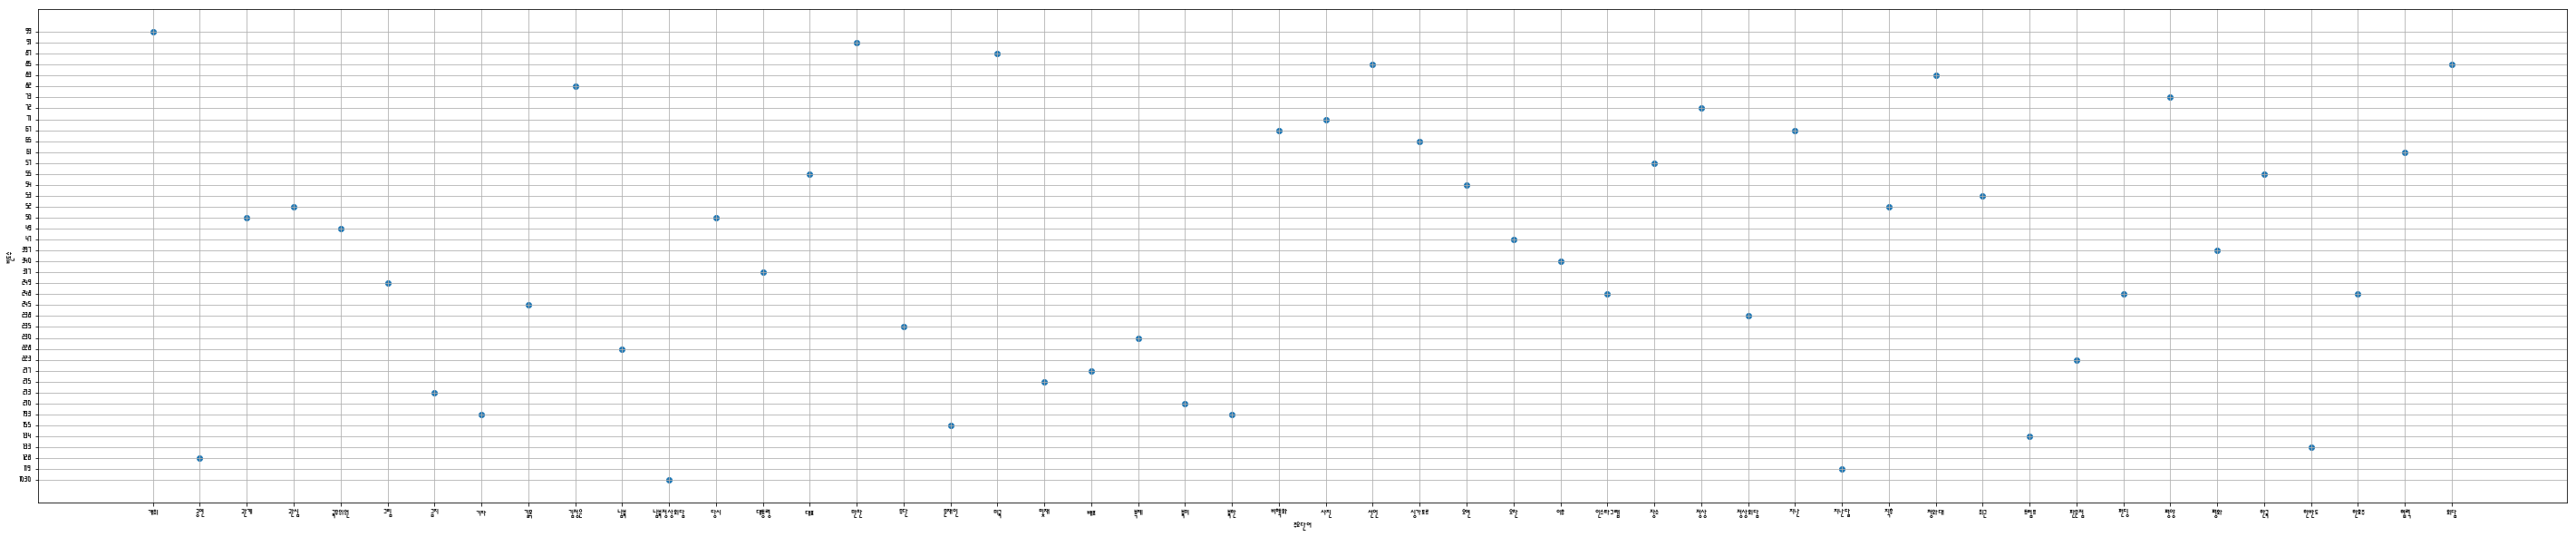

In [19]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (50,10) 

x=SN_Korea['주요단어']
y=SN_Korea['빈도수']

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
plt.scatter(x,y)

In [20]:
Korea_D = pd.Series(SN_Korea.빈도수, dtype ='i')
Korea_N = pd.Series(SN_Korea.주요단어)

Text(0,0.5,'남북정상회담')

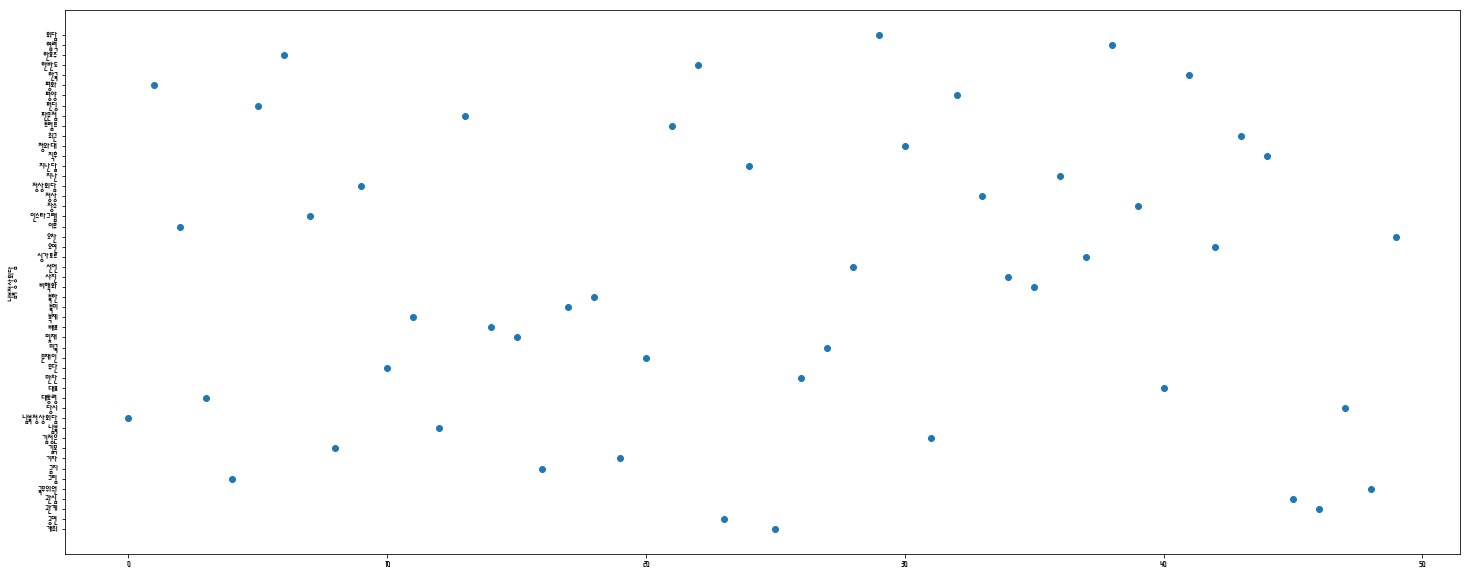

In [23]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.scatter(SN_Korea.index, Korea_N) 
plt.ylabel('남북정상회담') 

In [24]:
font_location="C:\Windows\Fonts\H2SA1M.ttf"
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
    
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(SN_Korea.index, Korea_D)
plt.xticks(SN_Korea.index, Korea_N, rotation='75')
plt.ylabel('남북정상회담') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()